In [1]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

warnings.simplefilter('ignore', FutureWarning)

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# fetch multiple asset data
def getMultiAssetData(ticketList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
Y|AAPL|Apple Inc. - Common Stock|Q|Q|N|100|N|N||AAPL|N 
Y|AMZN|Amazon.com, Inc. - Common Stock|Q|Q|N|100|N|N||AMZN|N 
Y|CCEP|Coca-Cola European Partners plc Ordinary Shares|N| |N|100|N||CCEP|CCEP|N 
Y|FB|Facebook, Inc. - Class A Common Stock|Q|Q|N|100|N|N||FB|N 
Y|JNJ|Johnson & Johnson Common Stock|N| |N|100|N||JNJ|JNJ|N 
Y|JWN|Nordstrom, Inc. Common Stock|N| |N|100|N||JWN|JWN|N 
Y|NVS|Novartis AG Common Stock|N| |N|100|N||NVS|NVS|N 
Y|PG|Procter & Gamble Company (The) Common Stock|N| |N|100|N||PG|PG|N 

In [3]:
date_from = datetime.date(2020, 1, 1)
date_to = datetime.date(2020, 8, 31)
tickerList = ['AAPL', 'AMZN', 'CCEP', 'FB', 'JNJ', 'JWN', 'NVS', 'PG']
multiData = getMultiAssetData(tickerList, date_from, date_to)
df = multiData.copy()

In [4]:
df.loc['AAPL', :]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
...,...,...,...,...,...,...
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002


In [5]:
# use pivot to reshape DataFrame with only Adj Close
adjClosePrice = df[['Adj Close']]
adjClosePrice = adjClosePrice.reset_index()
adjClosePriceTable = adjClosePrice.pivot(index='Date', columns='Ticker', values='Adj Close')
adjClosePriceTable.tail()
# adjClosePriceTable.index
# adjClosePriceTable.columns

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,124.824997,3346.489990,41.750000,280.820007,152.059998,15.54,86.449997,139.059998
2020-08-26,126.522499,3441.850098,41.500000,303.910004,152.300003,14.69,87.029999,138.389999
2020-08-27,125.010002,3400.000000,41.500000,293.220001,152.979996,14.79,87.000000,138.210007
2020-08-28,124.807503,3401.800049,41.919998,293.660004,153.639999,15.68,86.599998,138.770004
2020-08-31,129.039993,3450.959961,41.160000,293.200012,153.410004,16.00,86.059998,138.330002


In [6]:
# calculate daily return and cumulative return from daily return
daily_pct_change = adjClosePriceTable.pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()
cumprod_daily_pct_change.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,1.673862,1.763157,0.819753,1.338641,1.062657,0.392435,0.943519,1.148268
2020-08-26,1.696625,1.813399,0.814844,1.448708,1.064334,0.370969,0.949849,1.142735
2020-08-27,1.676343,1.791350,0.814844,1.397750,1.069086,0.373495,0.949522,1.141249
2020-08-28,1.673628,1.792298,0.823090,1.399847,1.073699,0.395970,0.945156,1.145873
2020-08-31,1.730384,1.818199,0.808168,1.397655,1.072091,0.404051,0.939263,1.142240


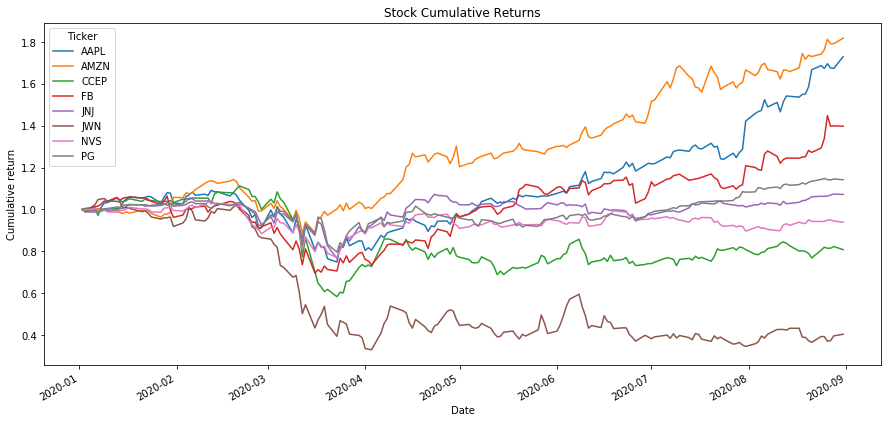

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
cumprod_daily_pct_change.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Stock Cumulative Returns')
plt.show()

In [8]:
# asset weights
wts = [0.15, 0.15, 0.05, 0.2, 0.15, 0.05, 0.15, 0.1]
weighted_return = (wts * daily_pct_change)
weighted_return.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,-0.001231,0.001770,0.000865,0.006949,-0.000089,-0.000096,0.000122,0.000397
2020-08-26,0.002040,0.004274,-0.000299,0.016445,0.000237,-0.002735,0.001006,-0.000482
2020-08-27,-0.001793,-0.001824,0.000000,-0.007035,0.000670,0.000340,-0.000052,-0.000130
2020-08-28,-0.000243,0.000079,0.000506,0.000300,0.000647,0.003009,-0.000690,0.000405
2020-08-31,0.005087,0.002168,-0.000906,-0.000313,-0.000225,0.001020,-0.000935,-0.000317


In [9]:
# portfolio calculation
portfolio_return = weighted_return.sum(axis=1)
cumprod_portfolio = (1 + portfolio_return).cumprod()
cumprod_portfolio.tail()

Date
2020-08-25    1.232494
2020-08-26    1.257743
2020-08-27    1.245387
2020-08-28    1.250386
2020-08-31    1.257361
dtype: float64

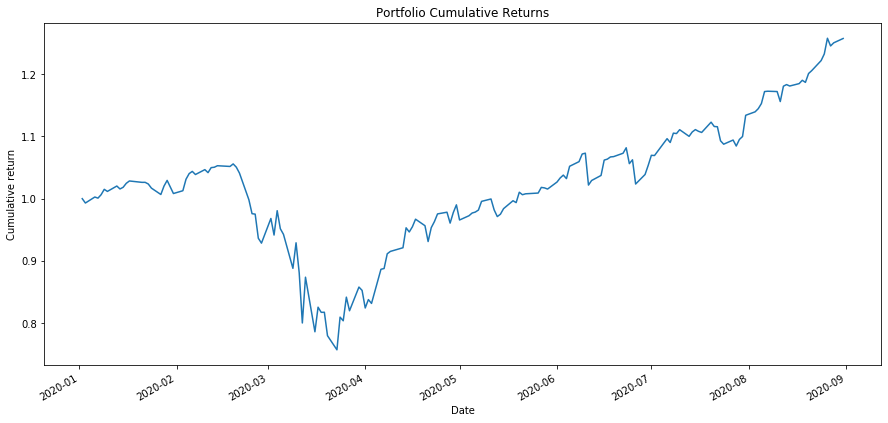

In [10]:
%matplotlib inline
fig2 = plt.figure(figsize=(15, 7))
ax2 = fig2.add_subplot(1, 1, 1)
cumprod_portfolio.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative return')
ax2.set_title('Portfolio Cumulative Returns')
plt.show()